<a href="https://colab.research.google.com/github/marymuench/Interactions-of-Book-Ratings-and-Copies-Sold/blob/main/MaryMuench_DataWrangling_Mod_4_Combining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
from scipy.stats import ttest_ind # t-test

# **Module 4 Assignment**
Mary Muench
u1196723

#Question
How does average rating for a book interact with the number of copies sold?

# Read in the data

In [ ]:
books = pd.read_csv('combining-3-books.csv')
books.head()

,title,author,language,year,copiesSold,genre
0,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[17][18],Fantasy
1,The Little Prince,Antoine de Saint-Exupéry,French,1943,100 million[19],Novella
2,Dream of the Red Chamber,Cao Xueqin,Chinese,1800,100 million[19],Family saga
3,The Hobbit,J. R. R. Tolkien,English,1937,100 million[19],Fantasy
4,And Then There Were None,Agatha Christie,English,1939,100 million[20],Mystery


In [ ]:
goodreads = pd.read_csv('combining-3-goodreads.csv')
goodreads.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic


# Data Cleaning and Combining


First, I will clean up the books dataframe.

In [ ]:
books.dtypes

title         object
author        object
language      object
year           int64
copiesSold    object
genre         object
dtype: object

We need to clean some of the strings so that they are consistent and don't contain strange characters. In addition, copiesSold needs to be cleaned to get rid of sources, as that is not relevant for making conclusions.

In [ ]:
books['genre'] = books['genre'].str.upper()
books['title'] = books['title'].str.upper()
books['language'] = books['language'].str.upper()
books['author'] = books['author'].str.upper()
books = books[books['language'] == 'ENGLISH']
books

,title,author,language,year,copiesSold,genre
0,HARRY POTTER AND THE PHILOSOPHER'S STONE,J. K. ROWLING,ENGLISH,1997,120 million[17][18],FANTASY
3,THE HOBBIT,J. R. R. TOLKIEN,ENGLISH,1937,100 million[19],FANTASY
4,AND THEN THERE WERE NONE,AGATHA CHRISTIE,ENGLISH,1939,100 million[20],MYSTERY
5,"THE LION, THE WITCH AND THE WARDROBE",C. S. LEWIS,ENGLISH,1950,85 million[21],FANTASY
6,SHE: A HISTORY OF ADVENTURE,H. RIDER HAGGARD,ENGLISH,1887,83 million[22],ADVENTURE
...,...,...,...,...,...,...
160,THE FRONT RUNNER,PATRICIA NELL WARREN,ENGLISH,1974,10 million[168],NaN
161,THE GOAL,ELIYAHU M. GOLDRATT,ENGLISH,1984,10 million[169],NaN
162,FAHRENHEIT 451,RAY BRADBURY,ENGLISH,1953,10 million[170],NaN
163,ANGELA'S ASHES,FRANK MCCOURT,ENGLISH,1996,10 million[171],NaN


In [ ]:
books.dropna(subset=['copiesSold'])

def clean_copies(copy):
  copy = str(copy)
  copy = copy.split(" ")
  try:
    return float(copy[0])
  except:
    return np.nan
books.dropna(subset=['copiesSold'], inplace=True)
books['copiesSold'] = books['copiesSold'].apply(clean_copies)
books = books.rename(columns={'copiesSold':'copiesSold (millions)'})
books


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,title,author,language,year,copiesSold (millions),genre
0,HARRY POTTER AND THE PHILOSOPHER'S STONE,J. K. ROWLING,ENGLISH,1997,120.0,FANTASY
3,THE HOBBIT,J. R. R. TOLKIEN,ENGLISH,1937,100.0,FANTASY
4,AND THEN THERE WERE NONE,AGATHA CHRISTIE,ENGLISH,1939,100.0,MYSTERY
5,"THE LION, THE WITCH AND THE WARDROBE",C. S. LEWIS,ENGLISH,1950,85.0,FANTASY
6,SHE: A HISTORY OF ADVENTURE,H. RIDER HAGGARD,ENGLISH,1887,83.0,ADVENTURE
...,...,...,...,...,...,...
159,THE GIVER,LOIS LOWRY,ENGLISH,1993,10.0,NaN
160,THE FRONT RUNNER,PATRICIA NELL WARREN,ENGLISH,1974,10.0,NaN
161,THE GOAL,ELIYAHU M. GOLDRATT,ENGLISH,1984,10.0,NaN
162,FAHRENHEIT 451,RAY BRADBURY,ENGLISH,1953,10.0,NaN


Now, we will clean the goodreads data.

In [ ]:
goodreads = goodreads.drop_duplicates(subset=['title','authors'])
goodreads['title'] = goodreads['title'].str.upper()
goodreads['authors'] = goodreads['authors'].str.upper()
goodreads['publisher'] = goodreads['publisher'].str.upper()
goodreads = goodreads[goodreads['language_code'] == 'eng']
goodreads.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,HARRY POTTER AND THE HALF-BLOOD PRINCE (HARRY ...,J.K. ROWLING/MARY GRANDPRÉ,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,SCHOLASTIC INC.
1,2,HARRY POTTER AND THE ORDER OF THE PHOENIX (HAR...,J.K. ROWLING/MARY GRANDPRÉ,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,SCHOLASTIC INC.
2,4,HARRY POTTER AND THE CHAMBER OF SECRETS (HARRY...,J.K. ROWLING,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,SCHOLASTIC
3,5,HARRY POTTER AND THE PRISONER OF AZKABAN (HARR...,J.K. ROWLING/MARY GRANDPRÉ,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,SCHOLASTIC INC.
4,8,HARRY POTTER BOXED SET BOOKS 1-5 (HARRY POTTE...,J.K. ROWLING/MARY GRANDPRÉ,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,SCHOLASTIC


In [ ]:
goodreads.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
  num_pages           object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
dtype: object

In [ ]:
goodreads = goodreads.rename(columns={'  num_pages': 'num_pages'})

In [ ]:
goodreads['num_pages'] = goodreads['num_pages'].replace(['en-US'],'0')
goodreads['num_pages'] = goodreads['num_pages'].replace(['eng'],'0')
goodreads['num_pages'] = pd.to_numeric(goodreads['num_pages'])
goodreads = goodreads.drop(columns=['bookID','isbn','isbn13'])


I would like to combine based on Title, but there may be issues regarding titles that have the same name. To rectify this, I will attempt to join based on both title and author. However, looking at the data, there is a clear issue. Some of the titles in the goodreads dataframe have extraneous information, such as the series and series number for the book. Hence, a title that is the same but is entered into the two tables differently would not combine properly. 

In [ ]:
def clean_titles(copy):
  copy = str(copy)
  try:
    pIndex = copy.index("(")
    copy = copy[:pIndex-1]
    return copy
  except:
    return copy
books['title'] = books['title'].apply(clean_titles)
goodreads['title'] = goodreads['title'].apply(clean_titles)
goodreads.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,HARRY POTTER AND THE HALF-BLOOD PRINCE,J.K. ROWLING/MARY GRANDPRÉ,4.57,eng,652,2095690,27591,9/16/2006,SCHOLASTIC INC.
1,HARRY POTTER AND THE ORDER OF THE PHOENIX,J.K. ROWLING/MARY GRANDPRÉ,4.49,eng,870,2153167,29221,9/1/2004,SCHOLASTIC INC.
2,HARRY POTTER AND THE CHAMBER OF SECRETS,J.K. ROWLING,4.42,eng,352,6333,244,11/1/2003,SCHOLASTIC
3,HARRY POTTER AND THE PRISONER OF AZKABAN,J.K. ROWLING/MARY GRANDPRÉ,4.56,eng,435,2339585,36325,5/1/2004,SCHOLASTIC INC.
4,HARRY POTTER BOXED SET BOOKS 1-5,J.K. ROWLING/MARY GRANDPRÉ,4.78,eng,2690,41428,164,9/13/2004,SCHOLASTIC


In [ ]:
def clean_authors(author):
  author = str(author)
  author = author.replace(" ","")
  return author

books['author'] = books['author'].apply(clean_authors)
goodreads['authors'] = goodreads['authors'].apply(clean_authors)
goodreads.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,HARRY POTTER AND THE HALF-BLOOD PRINCE,J.K.ROWLING/MARYGRANDPRÉ,4.57,eng,652,2095690,27591,9/16/2006,SCHOLASTIC INC.
1,HARRY POTTER AND THE ORDER OF THE PHOENIX,J.K.ROWLING/MARYGRANDPRÉ,4.49,eng,870,2153167,29221,9/1/2004,SCHOLASTIC INC.
2,HARRY POTTER AND THE CHAMBER OF SECRETS,J.K.ROWLING,4.42,eng,352,6333,244,11/1/2003,SCHOLASTIC
3,HARRY POTTER AND THE PRISONER OF AZKABAN,J.K.ROWLING/MARYGRANDPRÉ,4.56,eng,435,2339585,36325,5/1/2004,SCHOLASTIC INC.
4,HARRY POTTER BOXED SET BOOKS 1-5,J.K.ROWLING/MARYGRANDPRÉ,4.78,eng,2690,41428,164,9/13/2004,SCHOLASTIC


In [ ]:
def clean_authors(copy):
  copy = str(copy)
  try:
    sIndex = copy.index("/")
    copy = copy[:sIndex]
    return copy
  except:
    return copy
books['author'] = books['author'].apply(clean_authors)
goodreads['authors'] = goodreads['authors'].apply(clean_authors)

goodreads.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,HARRY POTTER AND THE HALF-BLOOD PRINCE,J.K.ROWLING,4.57,eng,652,2095690,27591,9/16/2006,SCHOLASTIC INC.
1,HARRY POTTER AND THE ORDER OF THE PHOENIX,J.K.ROWLING,4.49,eng,870,2153167,29221,9/1/2004,SCHOLASTIC INC.
2,HARRY POTTER AND THE CHAMBER OF SECRETS,J.K.ROWLING,4.42,eng,352,6333,244,11/1/2003,SCHOLASTIC
3,HARRY POTTER AND THE PRISONER OF AZKABAN,J.K.ROWLING,4.56,eng,435,2339585,36325,5/1/2004,SCHOLASTIC INC.
4,HARRY POTTER BOXED SET BOOKS 1-5,J.K.ROWLING,4.78,eng,2690,41428,164,9/13/2004,SCHOLASTIC


The following code is based off of lecture 15: combining data.

In [ ]:
"There are {0:,} unique titles in 'books'".format(len(books['title'].unique()))

"There are 123 unique titles in 'books'"

In [ ]:
"There are {0:,} unique values in 'goodreads'".format(len(goodreads['title'].unique()))

"There are 8,167 unique values in 'goodreads'"

In [ ]:
in_books_but_not_goodreads_set = set(books['title'].unique()) - set(goodreads['title'].unique())

in_batting_but_not_master_set = set(goodreads['title'].unique()) - set(books['title'].unique())

print("There are {0:,} \"titles\"s in books but not in goodreads.".format(len(in_books_but_not_goodreads_set)))
print("There are {0:,} \"titles\"s in goodreads but not in books.".format(len(in_batting_but_not_master_set)))

There are 75 "titles"s in books but not in goodreads.
There are 8,119 "titles"s in goodreads but not in books.


In [ ]:
bg_inner_df = pd.merge(left = books, right = goodreads,
                                  left_on = ['title','author'], right_on = ['title','authors'],
                                  how='inner')
bg_inner_df

,title,author,language,year,copiesSold (millions),genre,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,THE HOBBIT,J.R.R.TOLKIEN,ENGLISH,1937,100.0,FANTASY,J.R.R.TOLKIEN,4.27,eng,366,2530894,32871,8/15/2002,HOUGHTON MIFFLIN
1,AND THEN THERE WERE NONE,AGATHACHRISTIE,ENGLISH,1939,100.0,MYSTERY,AGATHACHRISTIE,4.26,eng,264,625767,18785,5/3/2004,ST. MARTIN'S PRESS
2,AND THEN THERE WERE NONE,AGATHACHRISTIE,ENGLISH,1939,100.0,MYSTERY,AGATHACHRISTIE,4.26,eng,0,214,49,10/15/2004,AUDIOGO
3,THE DA VINCI CODE,DANBROWN,ENGLISH,2003,80.0,MYSTERY THRILLER,DANBROWN,3.84,eng,489,1679706,35877,3/28/2006,ANCHOR
4,THE DA VINCI CODE,DANBROWN,ENGLISH,2003,80.0,MYSTERY THRILLER,DANBROWN,3.84,eng,467,1120,105,3/28/2006,BROADWAY BOOKS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CATCH-22,JOSEPHHELLER,ENGLISH,1961,10.0,NaN,JOSEPHHELLER,3.98,eng,519,5517,452,10/6/1994,VINTAGE
68,THE GIVER,LOISLOWRY,ENGLISH,1993,10.0,NaN,LOISLOWRY,4.13,eng,208,1585589,56604,1/24/2006,EMBER
69,FAHRENHEIT 451,RAYBRADBURY,ENGLISH,1953,10.0,NaN,RAYBRADBURY,3.99,eng,5,483,146,11/1/2005,BLACKSTONE AUDIOBOOKS
70,FAHRENHEIT 451,RAYBRADBURY,ENGLISH,1953,10.0,NaN,RAYBRADBURY,3.99,eng,186,5733,606,4/1/2004,DEL REY


In [ ]:
bg_inner_df = bg_inner_df[bg_inner_df['num_pages'] > 50]
bg_inner_df

,title,author,language,year,copiesSold (millions),genre,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,THE HOBBIT,J.R.R.TOLKIEN,ENGLISH,1937,100.0,FANTASY,J.R.R.TOLKIEN,4.27,eng,366,2530894,32871,8/15/2002,HOUGHTON MIFFLIN
1,AND THEN THERE WERE NONE,AGATHACHRISTIE,ENGLISH,1939,100.0,MYSTERY,AGATHACHRISTIE,4.26,eng,264,625767,18785,5/3/2004,ST. MARTIN'S PRESS
3,THE DA VINCI CODE,DANBROWN,ENGLISH,2003,80.0,MYSTERY THRILLER,DANBROWN,3.84,eng,489,1679706,35877,3/28/2006,ANCHOR
4,THE DA VINCI CODE,DANBROWN,ENGLISH,2003,80.0,MYSTERY THRILLER,DANBROWN,3.84,eng,467,1120,105,3/28/2006,BROADWAY BOOKS
6,HARRY POTTER AND THE CHAMBER OF SECRETS,J.K.ROWLING,ENGLISH,1998,77.0,FANTASY,J.K.ROWLING,4.42,eng,352,6333,244,11/1/2003,SCHOLASTIC
7,HARRY POTTER AND THE CHAMBER OF SECRETS,J.K.ROWLING,ENGLISH,1998,77.0,FANTASY,J.K.ROWLING,4.42,eng,341,2293963,34692,6/2/1999,ARTHUR A. LEVINE BOOKS / SCHOLASTIC INC.
8,HARRY POTTER AND THE PRISONER OF AZKABAN,J.K.ROWLING,ENGLISH,1999,65.0,FANTASY,J.K.ROWLING,4.56,eng,435,2339585,36325,5/1/2004,SCHOLASTIC INC.
9,HARRY POTTER AND THE PRISONER OF AZKABAN,J.K.ROWLING,ENGLISH,1999,65.0,FANTASY,J.K.ROWLING,4.56,eng,480,3141,140,7/1/2008,BLOOMSBURY UK
10,HARRY POTTER AND THE GOBLET OF FIRE,J.K.ROWLING,ENGLISH,2000,65.0,FANTASY,J.K.ROWLING,4.56,eng,636,18754,906,7/8/2000,BLOOMSBURY
11,HARRY POTTER AND THE ORDER OF THE PHOENIX,J.K.ROWLING,ENGLISH,2003,65.0,FANTASY,J.K.ROWLING,4.49,eng,870,2153167,29221,9/1/2004,SCHOLASTIC INC.


There are a lot of the same books with multiple entries, with different book lengths for some reason. However, these duplicate entries are still consistent for copies sold and average rating, so it is not necessary to fix this problem for this investigation.

Now that we finally have a baseline dataframe, perform basic EDA and finish cleaning data:


In [ ]:
bg_inner_df = bg_inner_df.drop_duplicates(subset=['title','author'])
bg_inner_df

,title,author,language,year,copiesSold (millions),genre,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,THE HOBBIT,J.R.R.TOLKIEN,ENGLISH,1937,100.0,FANTASY,J.R.R.TOLKIEN,4.27,eng,366,2530894,32871,8/15/2002,HOUGHTON MIFFLIN
1,AND THEN THERE WERE NONE,AGATHACHRISTIE,ENGLISH,1939,100.0,MYSTERY,AGATHACHRISTIE,4.26,eng,264,625767,18785,5/3/2004,ST. MARTIN'S PRESS
3,THE DA VINCI CODE,DANBROWN,ENGLISH,2003,80.0,MYSTERY THRILLER,DANBROWN,3.84,eng,489,1679706,35877,3/28/2006,ANCHOR
6,HARRY POTTER AND THE CHAMBER OF SECRETS,J.K.ROWLING,ENGLISH,1998,77.0,FANTASY,J.K.ROWLING,4.42,eng,352,6333,244,11/1/2003,SCHOLASTIC
8,HARRY POTTER AND THE PRISONER OF AZKABAN,J.K.ROWLING,ENGLISH,1999,65.0,FANTASY,J.K.ROWLING,4.56,eng,435,2339585,36325,5/1/2004,SCHOLASTIC INC.
10,HARRY POTTER AND THE GOBLET OF FIRE,J.K.ROWLING,ENGLISH,2000,65.0,FANTASY,J.K.ROWLING,4.56,eng,636,18754,906,7/8/2000,BLOOMSBURY
11,HARRY POTTER AND THE ORDER OF THE PHOENIX,J.K.ROWLING,ENGLISH,2003,65.0,FANTASY,J.K.ROWLING,4.49,eng,870,2153167,29221,9/1/2004,SCHOLASTIC INC.
12,HARRY POTTER AND THE HALF-BLOOD PRINCE,J.K.ROWLING,ENGLISH,2005,65.0,FANTASY,J.K.ROWLING,4.57,eng,652,2095690,27591,9/16/2006,SCHOLASTIC INC.
14,THE CATCHER IN THE RYE,J.D.SALINGER,ENGLISH,1951,65.0,COMING-OF-AGE,J.D.SALINGER,3.8,eng,277,2457092,43499,1/30/2001,BACK BAY BOOKS
16,LOLITA,VLADIMIRNABOKOV,ENGLISH,1955,50.0,GENERAL,VLADIMIRNABOKOV,3.89,eng,317,19513,2191,6/13/1997,VINTAGE INTERNATIONAL


In [ ]:
bg_inner_df.shape

(41, 14)

In [ ]:
bg_inner_df.head()

,title,author,language,year,copiesSold (millions),genre,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,THE HOBBIT,J.R.R.TOLKIEN,ENGLISH,1937,100.0,FANTASY,J.R.R.TOLKIEN,4.27,eng,366,2530894,32871,8/15/2002,HOUGHTON MIFFLIN
1,AND THEN THERE WERE NONE,AGATHACHRISTIE,ENGLISH,1939,100.0,MYSTERY,AGATHACHRISTIE,4.26,eng,264,625767,18785,5/3/2004,ST. MARTIN'S PRESS
3,THE DA VINCI CODE,DANBROWN,ENGLISH,2003,80.0,MYSTERY THRILLER,DANBROWN,3.84,eng,489,1679706,35877,3/28/2006,ANCHOR
6,HARRY POTTER AND THE CHAMBER OF SECRETS,J.K.ROWLING,ENGLISH,1998,77.0,FANTASY,J.K.ROWLING,4.42,eng,352,6333,244,11/1/2003,SCHOLASTIC
8,HARRY POTTER AND THE PRISONER OF AZKABAN,J.K.ROWLING,ENGLISH,1999,65.0,FANTASY,J.K.ROWLING,4.56,eng,435,2339585,36325,5/1/2004,SCHOLASTIC INC.


In [ ]:
bg_inner_df.tail()

,title,author,language,year,copiesSold (millions),genre,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
66,THE CAT IN THE HAT,DR.SEUSS,ENGLISH,1957,10.5,NaN,DR.SEUSS,4.17,eng,61,289,4,11/11/1997,RANDOM HOUSE BOOKS FOR YOUNG READERS
67,CATCH-22,JOSEPHHELLER,ENGLISH,1961,10.0,NaN,JOSEPHHELLER,3.98,eng,519,5517,452,10/6/1994,VINTAGE
68,THE GIVER,LOISLOWRY,ENGLISH,1993,10.0,NaN,LOISLOWRY,4.13,eng,208,1585589,56604,1/24/2006,EMBER
70,FAHRENHEIT 451,RAYBRADBURY,ENGLISH,1953,10.0,NaN,RAYBRADBURY,3.99,eng,186,5733,606,4/1/2004,DEL REY
71,ANGELA'S ASHES,FRANKMCCOURT,ENGLISH,1996,10.0,NaN,FRANKMCCOURT,4.11,eng,224,711,64,12/17/1998,SIMON & SCHUSTER


In [ ]:
bg_inner_df.dtypes

title                     object
author                    object
language                  object
year                       int64
copiesSold (millions)    float64
genre                     object
authors                   object
average_rating            object
language_code             object
num_pages                  int64
ratings_count              int64
text_reviews_count         int64
publication_date          object
publisher                 object
dtype: object

In [ ]:
bg_inner_df.describe()

,year,copiesSold (millions),num_pages,ratings_count,text_reviews_count
count,41.000000,41.000000,41.000000,4.100000e+01,41.000000
mean,1959.000000,34.573171,364.463415,6.209474e+05,12243.439024
std,41.155194,25.312932,253.732447,8.873019e+05,18818.213309
min,1813.000000,10.000000,61.000000,1.440000e+02,4.000000
25%,1939.000000,15.000000,197.000000,4.930000e+03,299.000000
50%,1961.000000,25.000000,277.000000,1.477480e+05,3358.000000
75%,1996.000000,50.000000,464.000000,9.991390e+05,18785.000000
max,2005.000000,100.000000,1152.000000,2.530894e+06,86881.000000


In [ ]:
bg_inner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 71
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  41 non-null     object 
 1   author                 41 non-null     object 
 2   language               41 non-null     object 
 3   year                   41 non-null     int64  
 4   copiesSold (millions)  41 non-null     float64
 5   genre                  15 non-null     object 
 6   authors                41 non-null     object 
 7   average_rating         41 non-null     object 
 8   language_code          41 non-null     object 
 9   num_pages              41 non-null     int64  
 10  ratings_count          41 non-null     int64  
 11  text_reviews_count     41 non-null     int64  
 12  publication_date       41 non-null     object 
 13  publisher              41 non-null     object 
dtypes: float64(1), int64(4), object(9)
memory usage: 4.8+ KB


In [ ]:
bg_inner_df['average_rating'] = pd.to_numeric(bg_inner_df['average_rating'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# genre is not relevant to the investigation and contains a lot of null values- drop from df
bg_inner_df.drop(columns=['genre'])

,title,author,language,year,copiesSold (millions),authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,THE HOBBIT,J.R.R.TOLKIEN,ENGLISH,1937,100.0,J.R.R.TOLKIEN,4.27,eng,366,2530894,32871,8/15/2002,HOUGHTON MIFFLIN
1,AND THEN THERE WERE NONE,AGATHACHRISTIE,ENGLISH,1939,100.0,AGATHACHRISTIE,4.26,eng,264,625767,18785,5/3/2004,ST. MARTIN'S PRESS
3,THE DA VINCI CODE,DANBROWN,ENGLISH,2003,80.0,DANBROWN,3.84,eng,489,1679706,35877,3/28/2006,ANCHOR
6,HARRY POTTER AND THE CHAMBER OF SECRETS,J.K.ROWLING,ENGLISH,1998,77.0,J.K.ROWLING,4.42,eng,352,6333,244,11/1/2003,SCHOLASTIC
8,HARRY POTTER AND THE PRISONER OF AZKABAN,J.K.ROWLING,ENGLISH,1999,65.0,J.K.ROWLING,4.56,eng,435,2339585,36325,5/1/2004,SCHOLASTIC INC.
10,HARRY POTTER AND THE GOBLET OF FIRE,J.K.ROWLING,ENGLISH,2000,65.0,J.K.ROWLING,4.56,eng,636,18754,906,7/8/2000,BLOOMSBURY
11,HARRY POTTER AND THE ORDER OF THE PHOENIX,J.K.ROWLING,ENGLISH,2003,65.0,J.K.ROWLING,4.49,eng,870,2153167,29221,9/1/2004,SCHOLASTIC INC.
12,HARRY POTTER AND THE HALF-BLOOD PRINCE,J.K.ROWLING,ENGLISH,2005,65.0,J.K.ROWLING,4.57,eng,652,2095690,27591,9/16/2006,SCHOLASTIC INC.
14,THE CATCHER IN THE RYE,J.D.SALINGER,ENGLISH,1951,65.0,J.D.SALINGER,3.80,eng,277,2457092,43499,1/30/2001,BACK BAY BOOKS
16,LOLITA,VLADIMIRNABOKOV,ENGLISH,1955,50.0,VLADIMIRNABOKOV,3.89,eng,317,19513,2191,6/13/1997,VINTAGE INTERNATIONAL


Validate against an external source

According to a study done by Jonah Berger and Alan T. Sorensen published to the Harvard Business Review, book sales can increase both from good and bad ratings. Berger writes, "Good reviews, as expected, increased sales across the board, with gains from 32% to 52%. For books by established authors, negative reviews caused a drop of about 15%, on average—also not surprising. But for books by relatively unknown authors, bad reviews caused sales to rise, by an average of 45%." This means that even thought it is expected that books that are rated well would sell more, it's possible that lower-rated books may also sell at high rates, perhaps due to these negative reviews. Berger hypothesizes that "by making consumers aware of a book they would otherwise not know about, even the harshest review can be a boon." 

Link to article: https://hbr.org/2012/03/bad-reviews-can-boost-sales-heres-why

# Visualizations

In [ ]:
bg_inner_df = bg_inner_df.sort_values(by='average_rating')

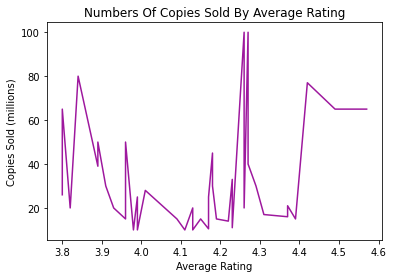

In [ ]:
bg_inner_df.plot(x='average_rating', y='copiesSold (millions)', xlabel='Average Rating', ylabel='Copies Sold (millions)', color='#9e189e', legend=False, title='Numbers Of Copies Sold By Average Rating')

# Statistical Test

In [ ]:
copies_for_ratings_greaterthan4 = bg_inner_df['copiesSold (millions)'][bg_inner_df['average_rating'] >= 4]
copies_for_ratings_lessthan4 = bg_inner_df['copiesSold (millions)'][bg_inner_df['average_rating'] < 4]

# ttest
t_score, p_value = ttest_ind(copies_for_ratings_greaterthan4, copies_for_ratings_lessthan4)

print('T Score: {}'.format(t_score))
print('P value: {}'.format(p_value))

T Score: 0.12375826389250036
P value: 0.9021423197470289


# Write Up and Conclusions

This investigation aimed to explores how book ratings interact with number of copies sold. The datasets utilized were obtained from the assignment instructions, #3, with book sales and Goodreads ratings. There were two Excel files attached: one was a table containing information about books and their sales overall, and one was a table containing information about the Goodreads entries for books, such as ratings or publisher information. The independent variable being investigated is average rating and the dependent variable is number of copies sold. This question is interesting because it may provide insight on if popular books are actually perceived as good books. 

The data cleaning and combining for this dataset was a challenge. The datasets individually contained a lot of missing information and nonoptimal data types. To remedy this issue, I loaded each table into a Pandas dataframe and began sifting through the data to locate problems. I changed all strings to all uppercase and removed spaces entirely in the Authors column, which I found became an issue later as I began to work on combining the data. Altering the strings allowed them to become more consistent and optimal for joining the tables. In addition, I cleaned many of the string type columns in order to convert them into numbers or make them more usable. I converted copiesSold to a numeric value, removed duplicates, and created a subset of only English language books to prevent overlap. (Note: some of the copiesSold entries came with caveats, like only reporting numbers sold in a certain country. For the sake of normalization, these values were treated as overall copiesSold due to this number being the maximum that could be located at this time. This is a limitation of the data and should be rectified for further investigation)

Then, I began working on combining the dataframes. The most promient overlapping columns between the two dataframes was book title and author, so I decided to use a combination of these two columns to merge the datasets. This allowed for there to be books with the same title and multiple titles by the same author, but preserved title author pairs. I decided to use an inner join on these two columns because it allowed me to only find books that were present in both tables, so they would have both rating and copies sold data. However, this idea immediately posed a problem. The way the titles and authors were entered into each dataframe was different and there were a lot of duplicate author title pairs that contained different values in different columns, perhaps due to alternate forms of the book. In order to mimimize this issue as much as possible in order to maximize the number of matching title author pairs that matched in the two dataframes, I began normalizing book titles by attempting to cut off extraneous information like series and series number, as well as normalizing author titles to only show the first author listed. In addition, I removed values with less than 50 pages listed, as well as removed duplicates in general. 

I then merged the two dataframes on their title author pairs and was able to locate 41 books in the combined dataframe. This is overall a fairly small number and further investigation of this question would require a more robust sample size in order to increase accuracy. However, for the scope of this investigation and to provide a starting point, this number will work to begin investigating the data. This is a limitation for the investigation and for this join approach, because inner join minimizes the amount of missing data and hence has the opportunity to produce less data points. In addition, the only data contained in the final set was title author pairs that appeared in both datasets based on the string cleaning methods utilized, which may not be a holistic representation.

As a final combined and preliminarily cleaned dataset was finally formed, I began running basic EDA procedures on the final dataset in order to check that it was correctly formatted, didn't have missing values, and was easy to use. 

Next, I generated visualizations to better understand the interactions of copies sold and average ratings. I developed a line plot using the Pandas dataframe functionality by sorting the books by rating and plotting the numbers of copies sold. The plot showed that there was not a clear trend for number of copies sold based on rating. There was a spike between 3.8 and 3.9, 4.2 and 4.3 and, again after 4.5, indicating one or more popular books obtained these ratings. 

In order to see if there was a statistical difference in number of copies sold for different ratings of books, I split the dataset into ratings above and below 4. I chose 4 because most book ratings fell between 3-5, so 4 was a good medium value to compare. I then utilized a t-test to see if there was a statistical difference in number of copies sold for books with ratings higher or lower than 4. I chose a ttest because there are no known population parameters and I am comparing two variables. The ttest ran a p-value of 0.9, which is higher than a alpha value of 0.05, indicating there is not a statistical difference with this dataset and confirming the null hypothesis that there is not a correlation between ratings and number of copies sold. This confirms the information found in the visualization.

While this investigation concluded that there was no correlation between book rating and number of copies sold, it would be an interesting extension of this project to run the same investigation with a much larger dataset. This would provide more insight on interactions between book ratings and number of copies sold. 

# References
“Bad Reviews Can Boost Sales. Here's Why.” Harvard Business Review, 1 Aug. 2014, [hbr.org/2012/03/bad-reviews-can-boost-sales-heres-why](https://)

“List of Best-Selling Books.” Wikipedia, Wikimedia Foundation, 19 Mar. 2022, [en.wikipedia.org/wiki/List_of_best-selling_books](https://)

Soumik. “Goodreads-Books.” Kaggle, 9 Mar. 2020, www.kaggle.com/datasets/jealousleopard/goodreadsbooks.